## Animazione una volta per tutte

Sia usando animando in tempo reale che usando FuncAnimation

In [19]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import display, clear_output, HTML

In [11]:
fig, ax = plt.subplots()
fig.suptitle('Esempio base animazione')
l,a = ax.plot([-1,1],[-3,3],[-1,1],[3,3])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
time_label = ax.text(0.05,0.9, '', transform = ax.transAxes)
l.set_label('$x^3$')
a.set_label('$x^2$')

N = 1000
x = np.linspace(-1.0,1.0, N)
y = x**3
z = x**2
plt.legend()

frames = 100
plt.close('all')



The animate functions draw the generic frame of the animation

In [12]:

def animate(i, frames=None, N=None):
  n = round(i*N/frames) #Mapping the number of points to be added for each frame
  l.set_data(x[:n], y[:n])
  a.set_data(x[:n], z[:n])
  time_label.set_text(f'Frame {i}')
  


Realtime animation using display

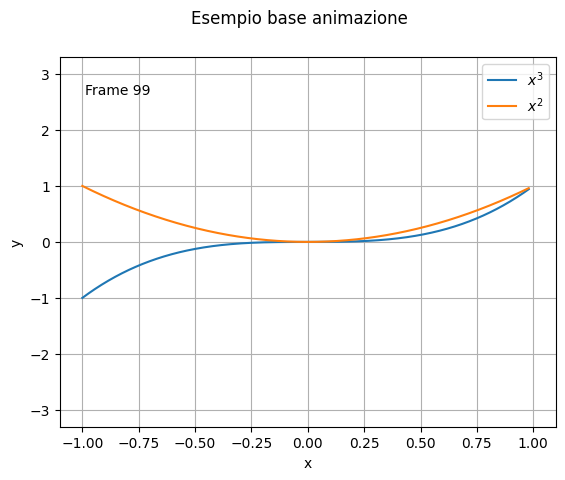

In [13]:
for i in range(frames):
    animate(i, frames, N)
    display(fig)
    clear_output(wait=True)   

Gif animation using jshtml()

In [14]:
duration = 5.0 #duration in seconds
fps = 10
n_frames = round(duration*fps) #total of frames to be drawn
ani = animation.FuncAnimation(fig, animate, n_frames, fargs = (n_frames,N), interval = 1000.0/fps)
plt.close('all')
HTML(ani.to_jshtml())


# Another way to do it 
In this way fig is not a gloabal variable and more plots can be animated using the same function

In [26]:
#This function defines the properties of the plot and gives in output the fig and the objects to update

def create_plot():
  fig, ax = plt.subplots()
  fig.suptitle('Esempio base animazione')
  l,a = ax.plot([-1,1],[-3,3],[-1,1],[3,3])
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.grid()
  time_label = ax.text(0.05,0.9, '', transform = ax.transAxes)
  l.set_label('$x^3$')
  a.set_label('$x^2$')
  ax.legend()
  plt.close(fig)
  return fig, (a, l, time_label)

#Plots the figure by updating the objects inside
def plot_figure(x):
  fig, artists = create_plot()
  a, l , time_label = artists[0], artists[1], artists[2]
  l.set_data(x, x**2)
  a.set_data(x, x**3)
  time_label.set_text(f'Frame: {i}')
  display(fig)
  
def animate_RT(frames):
  fig, artists = create_plot()
  X = np.linspace(-1,1, 1000)
  for i in range(frames):
    update(i, frames, artists)
    display(fig)
    clear_output(wait=True)  
    
def update(i, frames, artists):
  a, l , time_label = artists[0], artists[1], artists[2]
  n = round(1000/frames)
  X = np.linspace(-1,1, 1000)
  x = X[0:n*(i)]
  l.set_data(x, x**2)
  a.set_data(x, x**3)
  time_label.set_text(f'Frame: {i}')
    
def animate_HTML(duration):
  fig, artists = create_plot()
  fps = 10
  n_frames = round(duration*fps) #total of frames to be drawn
  ani = animation.FuncAnimation(fig, update, n_frames, fargs = (n_frames, artists), interval = 1000.0/fps)
  return ani

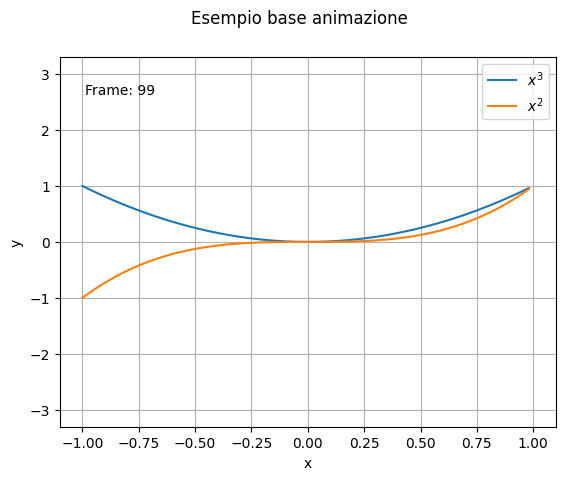

In [27]:
animate_RT(100)

In [28]:

ani = animate_HTML(5)
HTML(ani.to_jshtml())